# **Retail Exploratory Data Analysis and Forecasting Using ARIMA**

### Introduction:

Welcome to the Retail Sales Analysis Project. In this analysis, the performance and trends within the retail sales data will be explored. By examining key indicators like sales, profits, customer behavior, and geographical data and more, valuable insights are aimed to be gained to inform strategic decision-making and optimize business operations. Furthermore, this project will involve forecasting using the ARIMA model, enabling us to anticipate future sales patterns with greater accuracy. Through this comprehensive approach, the aim is to identify growth opportunities, enhance efficiency, and elevate the overall performance of the retail business.

### Business Questions Answered:
- What are the highest selling and most profitable product categories?
- What are the best selling and most profitable sub-categories?
- Which is the top selling sub-category?
- Who are the primary customer segments?
- What is the preferred ship mode?
- Which region is the most profitable?
- Which city has the highest number of sales?
- Which products are resulting in losses?
- How can the product mix be optimized to maximize profitability?
- How can marketing efforts be tailored to target specific customer segments?
- What promotional strategies can be developed to incentivize purchases?
- How can the catalogue be optimized to drive sales and profitability?




In [2]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('RetailDataMain.csv',parse_dates = ['Order Date','Ship Date'])
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,Jan,2011,151.0
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,Jan,2011,212.0
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,Jan,2011,120.0


In [4]:
data.shape

(51290, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Pr

In [6]:
# Unique Values
obj_col = data.columns
for col in obj_col:
    print("{}: {}".format(col,len(data[col].unique())))

Order ID: 25035
Order Date: 1430
Ship Date: 1464
Ship Mode: 4
Customer ID: 1590
Customer Name: 795
Segment: 3
City: 3636
State: 1094
Country: 147
Market: 7
Region: 13
Product ID: 10292
Category: 3
Sub-Category: 17
Product Name: 3788
Sales: 22995
Quantity: 14
Discount: 27
Profit: 24575
Shipping Cost: 10037
Order Priority: 4
Unit Price: 13290
Month: 12
Year: 4
Order Interval: 152


# **Exploratory Data Analysis**

## **Checking for Outliers**

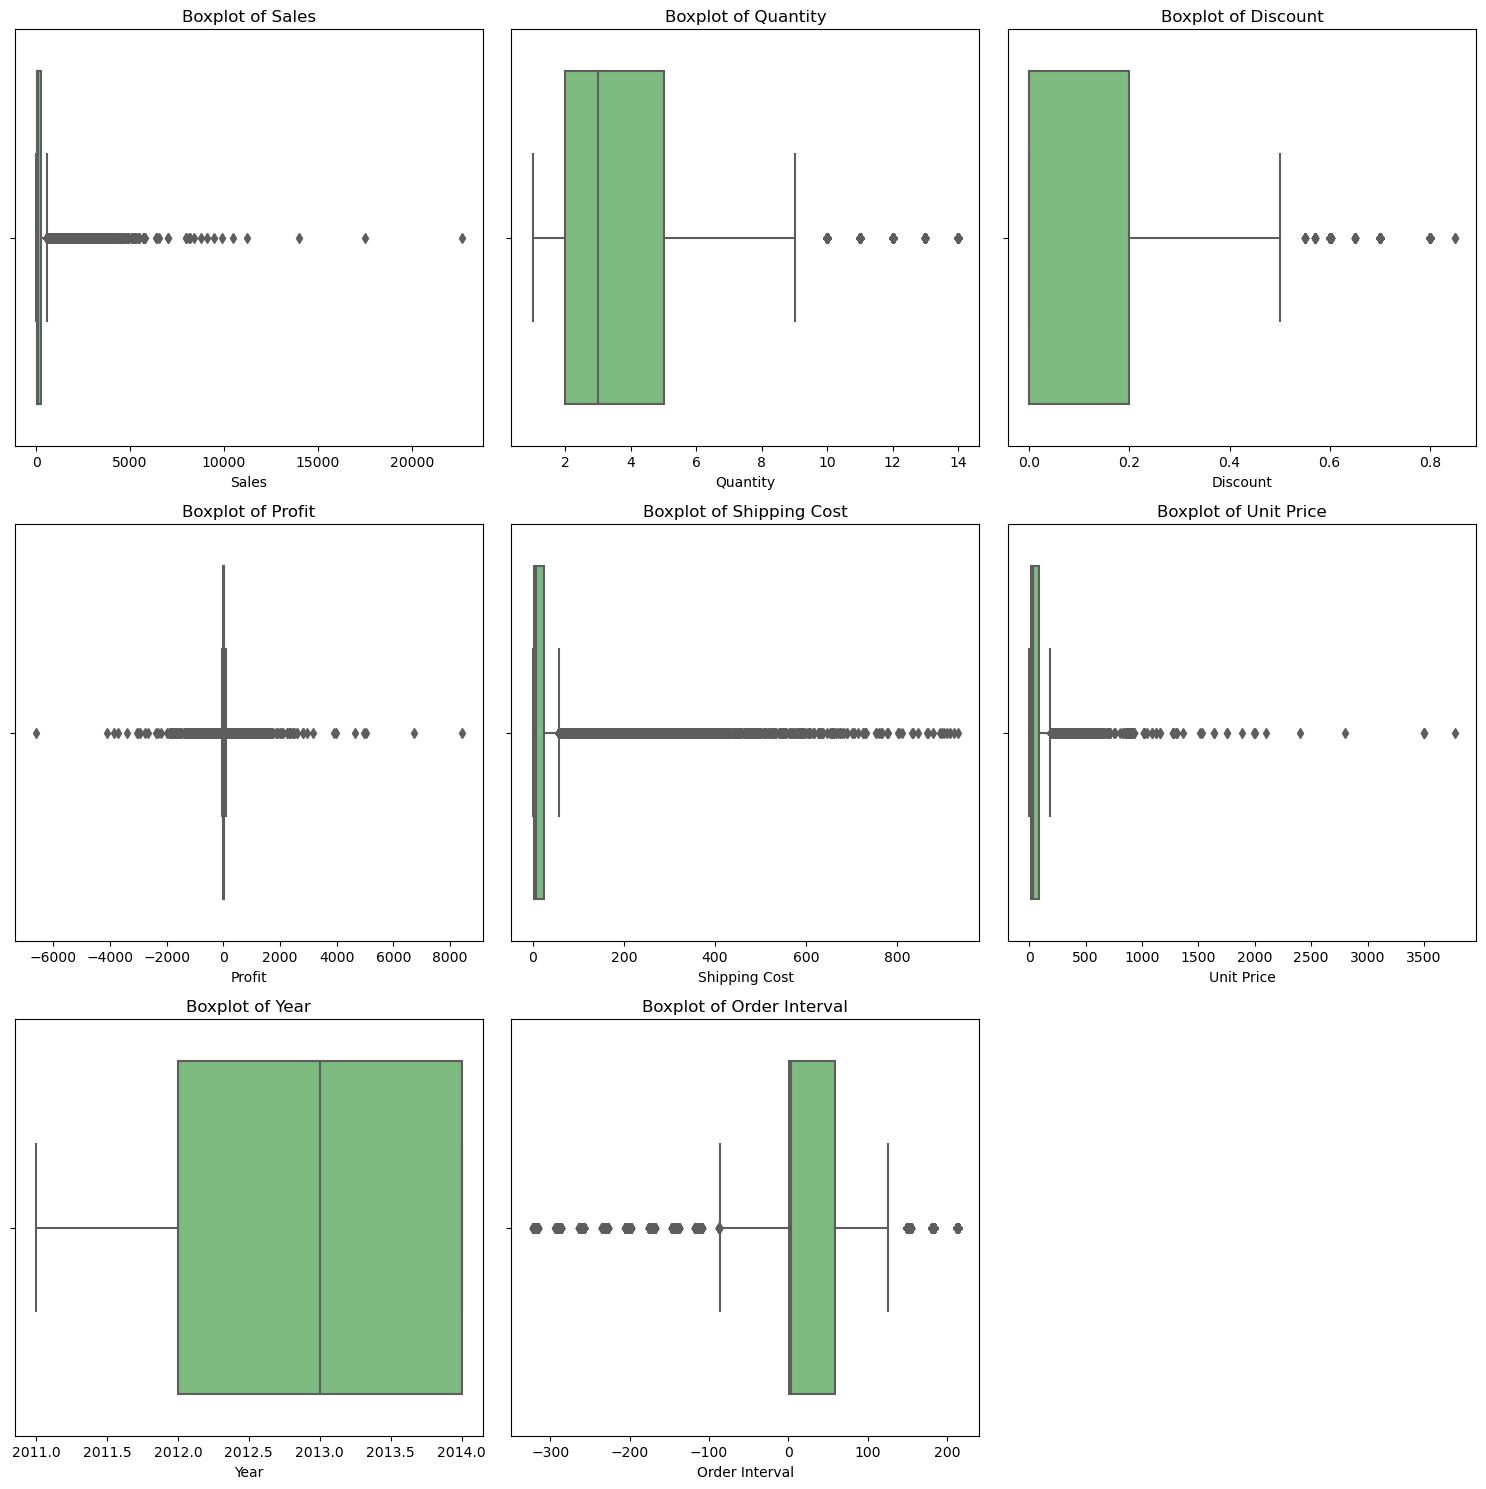

In [7]:

def check_outliers(df):
    numerical_columns = df.select_dtypes(['float64', 'int64']).columns
    num_cols = len(numerical_columns)
    num_rows = (num_cols - 1) // 3 + 1

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=df, x=col, ax=axes[i], palette='Greens')
        axes[i].set_title(f'Boxplot of {col}')

    for j in range(num_cols, num_rows * 3):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

check_outliers(data)


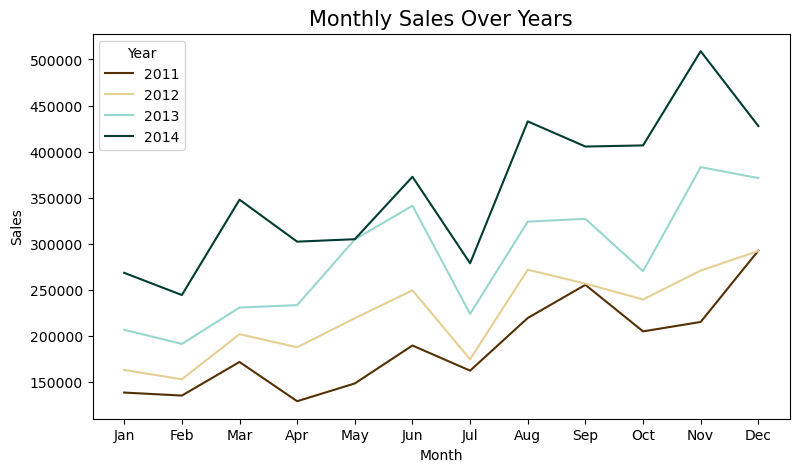

In [8]:
#Monthly Sales over Years
cmap = sns.color_palette("BrBG", as_cmap=True)
plt.figure(figsize=(9, 5))
sns.lineplot(x='Month', y='Sales', hue='Year', data=data, estimator=sum, ci=None, palette=cmap)
plt.title("Monthly Sales Over Years",fontsize = 15)
plt.ylabel('Sales')
plt.show()

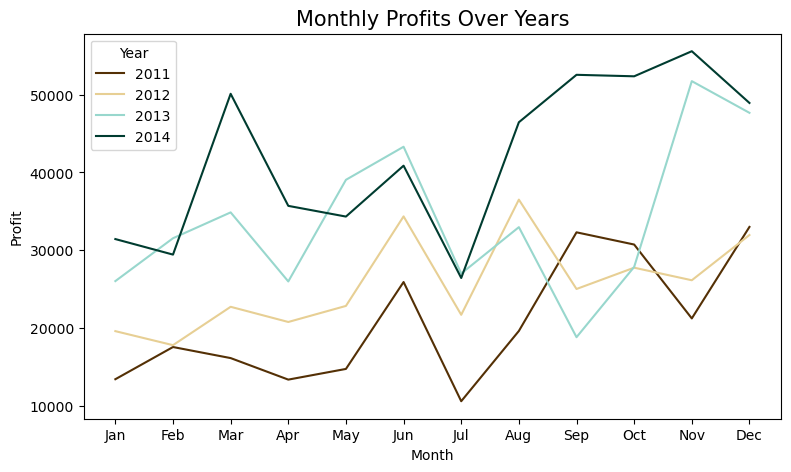

In [9]:
#Monthly Profits over Years
plt.figure(figsize=(9, 5))
sns.lineplot(x='Month', y='Profit', hue='Year', data=data, estimator=sum, ci=None, palette=cmap)
plt.title("Monthly Profits Over Years",fontsize = 15)
plt.ylabel('Profit')
plt.show()

## **Correlations**

Correlation between Quantity and Profis:  0.1
Correlation between Sales and Unit Price:  0.81
Correlation between Shipping Cost and Sales:  0.77
Correlation between Shipping Cost and Profis:  0.35
Correlation between Discount and Sales:  -0.09


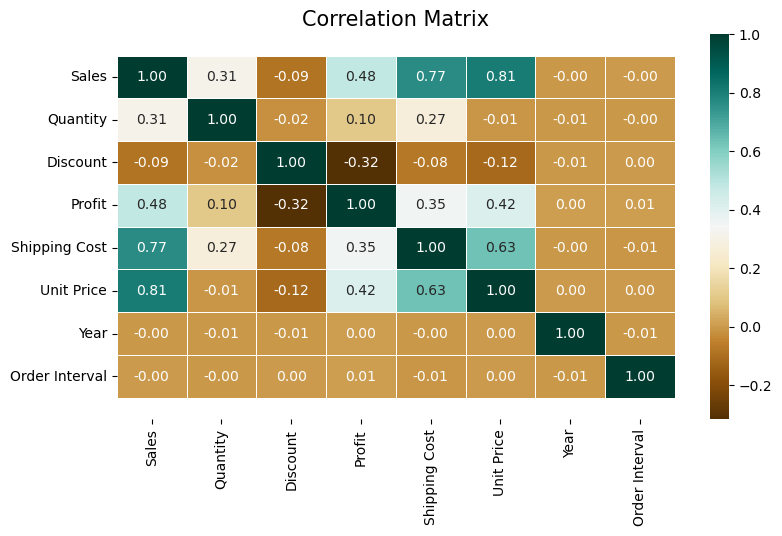

In [10]:
#Finding Correlations
# Visualizing the correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="BrBG");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix', fontsize = 15)

#Correlation between Quantity and Profit
corr = data['Quantity'].corr(data['Profit'])
print("Correlation between Quantity and Profis: ", round(corr, 2))

#Correlation between Sales and Unit Price
corr = data['Sales'].corr(data['Unit Price'])
print("Correlation between Sales and Unit Price: ", round(corr, 2))

#Correlation between Shipping Cost and Sales
corr = data['Shipping Cost'].corr(data['Sales'])
print("Correlation between Shipping Cost and Sales: ", round(corr, 2))

#Correlation between Shipping Cost and Profit
corr = data['Shipping Cost'].corr(data['Profit'])
print("Correlation between Shipping Cost and Profis: ", round(corr, 2))

##Correlation between Discount and Sales
corr = data['Discount'].corr(data['Sales'])
print("Correlation between Discount and Sales: ", round(corr, 2))

## **Market Breakdown**

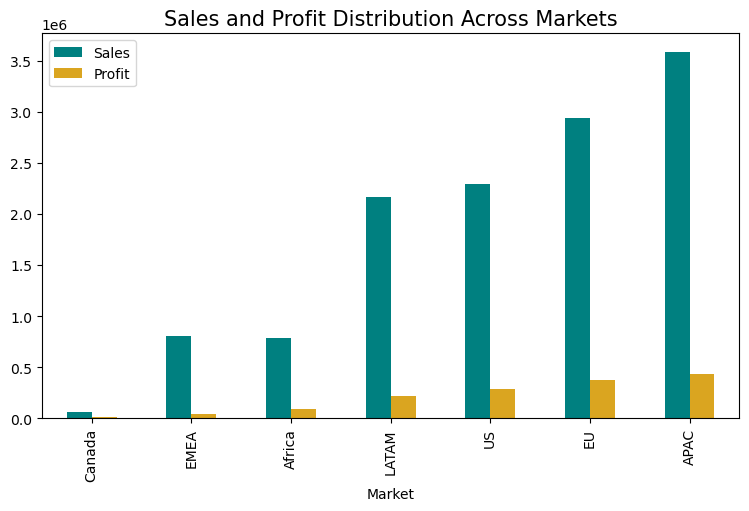

In [11]:
#Sales and Profit Per Market
sales_profit_market = pd.DataFrame(data.groupby(["Market"])["Sales","Profit"].sum())
sorted_profit = sales_profit_market.sort_values("Profit", ascending=True)
sorted_profit.plot(kind="bar", figsize=(9,5), color=['Teal','Goldenrod'])
plt.title("Sales and Profit Distribution Across Markets",fontsize = 15)
plt.show()

### **Observations:**
APAC  market has the most sales and is the Most Profitable market. 
The EU and US markets manage to achieve comparable profits to the APAC market despite lower sales.
Canada market has the lowest number of sales and least profits.


## **Category Breakdown**

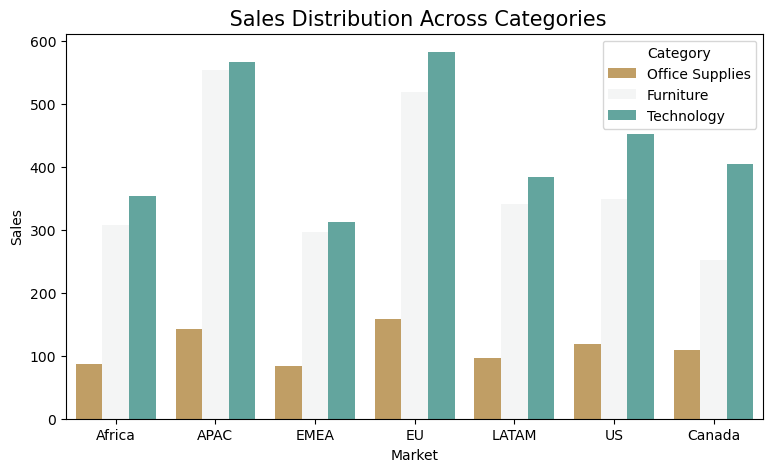

In [12]:
#Sales distribution across Categories
plt.figure(figsize=[9,5])
sns.barplot(x="Market", y="Sales", hue="Category", data=data, palette="BrBG",ci= None)
plt.title(" Sales Distribution Across Categories",fontsize = 15)
plt.show()

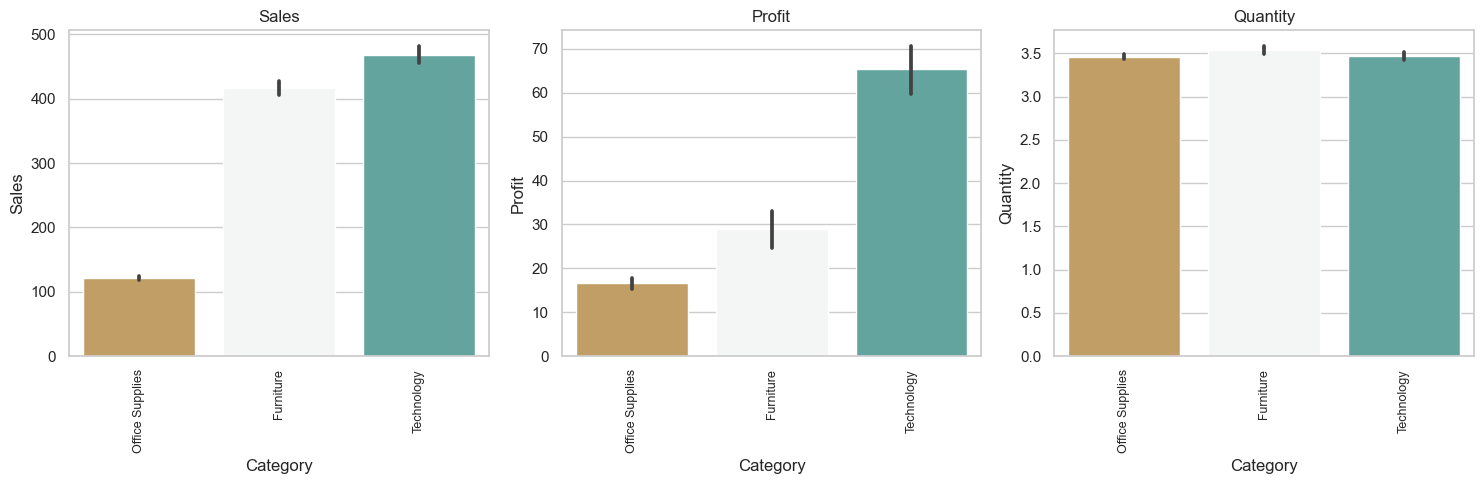

In [13]:
# Set for grouped plots - figure with a 1x3 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plot barplots with BrBG color palette
cat1 = sns.barplot(x="Category", y="Sales", data=data, ax=axis[0], palette="BrBG")
cat2 = sns.barplot(x="Category", y="Profit", data=data, ax=axis[1], palette="BrBG")
cat3 = sns.barplot(x="Category", y="Quantity", data=data, ax=axis[2], palette="BrBG")

# Set titles
cat1.set(title='Sales')
cat2.set(title='Profit')
cat3.set(title='Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation='vertical', size=9)
plt.setp(cat2.get_xticklabels(), rotation='vertical', size=9)
plt.setp(cat3.get_xticklabels(), rotation='vertical', size=9)

# Set spacing between subplots
figure.tight_layout()
plt.show()

### Observations
Technology exhibits the highest sales among all categories, followed by furniture, with office supplies trailing behind.
Technology stands out as both the best selling and the most profitable category, indicating its strong market performance.
Furniture, office supplies, and technology demonstrate similar quantities sold.
Despite selling reasonably well in terms of quantity, office supplies generate relatively low sales and profits, likely due to their lower price point compared to other categories.

In [14]:
# Top 5 cities with the highest Office Suppy orders
officecat = data.loc[(data.Category == 'Office Supplies')]
officetop5 = officecat.groupby('City')['Quantity'].sum().reset_index().nlargest(5,columns = "Quantity")
display(officetop5)

,City,Quantity
2102,New York City,2065
1747,Los Angeles,1688
2608,San Francisco,1220
2295,Philadelphia,1127
2695,Seattle,928


In [15]:
# Top 5 cities with the highest Furniture orders
furniturecat = data.loc[(data.Category == 'Furniture')]
furnituretop5= furniturecat.groupby('City')['Quantity'].sum().reset_index().nlargest(5,columns = "Quantity")
display(furnituretop5)

,City,Quantity
1480,New York City,720
1221,Los Angeles,588
1616,Philadelphia,449
1281,Manila,441
1892,Santo Domingo,417


In [16]:
# Top 5 cities with the highest Technology related orders
technologycat = data.loc[(data.Category == 'Technology')]
technologytop5= technologycat.groupby('City')['Quantity'].sum().reset_index().nlargest(5,columns = "Quantity")
display(technologytop5)

,City,Quantity
1522,New York City,632
1249,Los Angeles,603
1316,Manila,407
1655,Philadelphia,405
1930,Santo Domingo,335


### Observation:
New York and Los Angeles emerge as robust markets, consistently leading in terms of quantity sold across all categories.
The high sales quantities in these cities indicate their significance as strong markets, suggesting favorable consumer demand and potential profitability.

## **Sub-Category Sales and Profit Breakdown**

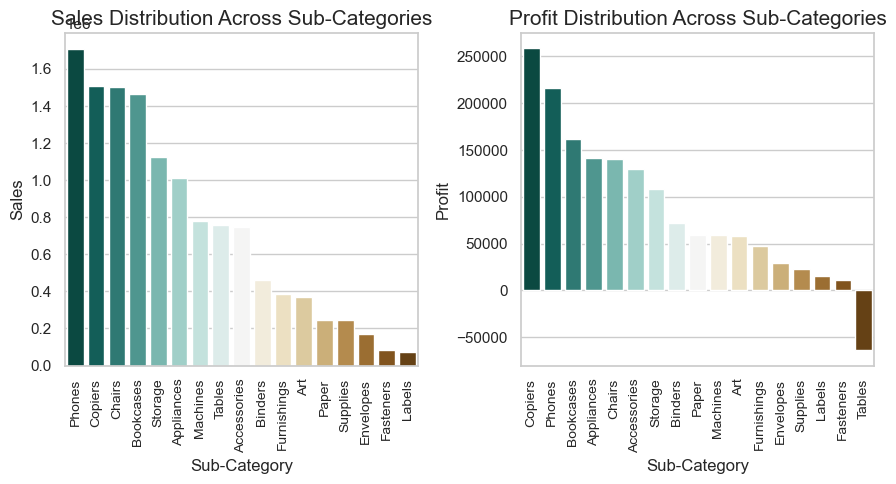

In [17]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(9, 5))

# Plot Bar Plot for Best Selling Sub-Category
sales_plot = data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
sales_bar = sns.barplot(x=sales_plot.index, y=sales_plot, ax=axis[0], palette="BrBG_r", ci=None)
sales_bar.set_title("Sales Distribution Across Sub-Categories", fontsize=15)
sales_bar.set_xticklabels(sales_bar.get_xticklabels(), rotation="vertical", size=10)

# Plot Bar Plot for Most Profitable Sub-Category
profit_plot = data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
profit_bar = sns.barplot(x=profit_plot.index, y=profit_plot, ax=axis[1], palette="BrBG_r", ci=None)
profit_bar.set_title("Profit Distribution Across Sub-Categories", fontsize=15)
profit_bar.set_xticklabels(profit_bar.get_xticklabels(), rotation="vertical", size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()



### Observation:
Copiers and phones emerge as the top two best-selling sub-categories, indicating strong demand among customers.
Copiers generate the highest profit, followed by phones, bookcases, appliances, and chairs. These sub-categories contribute significantly to the overall profitability of the business.The marketing strategy should prioritize promoting Copiers, Phones, Bookcases, Appliances, and Chairs to capitalize on their high sales and profitability.

On the other end, Tables, Fasteners, Labels, and Supplies exhibit low profitability or losses. The business could consider the following strategies for these products:
Increase the sale price and profit margin if feasible.
or Negotiate for lower prices from suppliers to improve profit margins.
By focusing on top-selling and profitable products while reevaluating underperforming items, the business can enhance its overall profitability and streamline its product offering to meet customer demand effectively.

In [18]:
#Least bought Sub-Categories from Canada Market

filtered_data = data[data["Market"] =="Canada"]
subcat_canquant = pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_canquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Tables,2,849.36,849.36,162.17,300.18,0.0
Furnishings,20,808.53,663.30,85.03,113.79,0.0
Chairs,24,3203.37,1709.85,428.87,856.74,0.0
Envelopes,25,567.18,260.13,76.97,171.18,0.0
Machines,25,4274.46,2842.05,510.09,607.80,0.0
Copiers,29,7465.53,2941.08,818.89,2663.64,0.0
Appliances,30,7940.43,4388.52,929.16,2233.98,0.0
Bookcases,32,5734.02,2246.34,518.68,1342.53,0.0
Fasteners,35,479.46,247.08,46.36,140.13,0.0


In [19]:
#Least bought Sub-Categories from EMEA Market

filtered_data = data[data["Market"] =="EMEA"]
subcat_EMEAquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_EMEAquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Tables,102,39333.921,18547.560,5339.08,2764.251,7.4
Appliances,323,68270.178,33649.938,6290.24,3024.048,32.1
Copiers,408,80140.419,36917.961,8689.79,8178.309,33.3
Paper,449,10251.660,4594.203,1136.81,887.340,41.1
Envelopes,486,10579.527,4842.180,1249.82,810.837,41.4
Bookcases,500,91736.916,42468.783,9420.89,7938.246,46.7
Labels,511,4093.383,1663.041,502.44,390.873,41.9
Supplies,546,14151.264,6202.938,1579.49,996.564,37.2
Machines,549,62029.416,28883.967,6971.87,2741.826,48.9


In [20]:
#Least bought Sub-Categories from Africa Market

filtered_data = data[data["Market"] =="Africa"]
subcat_afrquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_afrquant


,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Tables,87,34532.595,15953.100,3032.47,4010.685,4.9
Appliances,313,62186.376,31333.605,8562.00,3670.266,22.4
Bookcases,407,83457.408,41924.283,9071.74,7164.918,34.3
Envelopes,425,9687.981,4566.522,1069.19,1517.631,34.3
Chairs,437,56038.374,23654.337,6233.86,2784.084,31.5
Copiers,454,96257.682,42181.581,11010.82,14008.632,28.7
Machines,479,69104.415,30927.828,7726.09,5948.115,34.8
Accessories,484,42172.092,18474.231,4898.13,6478.182,28.0
Furnishings,500,20622.258,9066.282,2070.97,2302.398,29.4


In [21]:
#Least bought Sub-Categories from LATAM Market

filtered_data = data[data["Market"] =="LATAM"]
subcat_LATquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_LATquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Machines,500,40941.44600,11370.12400,4344.60,2355.64600,27.200
Tables,628,144880.32800,41388.35600,15466.82,-12305.85200,58.100
Appliances,1186,182075.24800,49885.15600,20224.38,26148.14800,38.200
Copiers,2211,316322.32308,88767.64408,32992.72,41045.44308,64.858
Supplies,2280,43238.56800,11823.46800,4586.99,7570.86800,68.200
Art,2294,41184.59600,10876.76800,4648.53,6950.69600,67.600
Labels,2309,13554.67200,3576.78400,1520.66,2385.93200,63.200
Furnishings,2338,62455.95600,16173.57400,6685.78,234.85600,142.200
Fasteners,2339,19144.68000,5181.33600,2071.52,2531.60000,75.800


In [22]:
#Least bought Sub-Categories from US Market

filtered_data = data[data["Market"] =="US"]
subcat_USquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_USquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Copiers,234,149528.0300,40869.4300,11239.63,55617.8249,11.00
Machines,440,189238.6310,48685.5340,15208.22,3384.7569,35.20
Supplies,647,46673.5380,13168.5400,3598.69,-1189.0995,14.60
Bookcases,868,114879.9963,29890.8346,11681.43,-3472.5560,48.14
Envelopes,906,16476.4020,4794.2100,1876.31,6964.1767,20.40
Fasteners,914,3024.2800,713.6600,302.03,949.5182,17.80
Tables,1241,206965.5320,52663.2675,22314.05,-17725.4811,83.35
Labels,1400,12486.3120,3028.6340,1248.37,5546.2540,25.00
Appliances,1729,107532.1610,28248.2950,12591.54,18138.0054,77.60


In [23]:
#Least bought Sub-Categories from EU Market

filtered_data = data[data["Market"] =="EU"]
subcat_EUquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_EUquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Tables,339,105381.3765,29258.0055,8974.28,-20998.4235,33.45
Appliances,1187,275439.1830,71669.4690,27892.51,46337.4330,36.80
Machines,1556,223164.8790,60512.2380,24531.52,17287.0890,62.65
Fasteners,1597,20330.3610,5501.2980,2242.60,4427.6010,39.20
Envelopes,1599,40124.0610,10889.9910,4168.73,8640.4710,27.20
Paper,1664,42450.8610,11338.3110,5070.66,8883.5610,29.50
Labels,1730,15644.6640,4119.5400,1732.30,3288.9240,26.60
Copiers,1733,365128.6140,99254.9715,38437.32,56199.6540,46.90
Furnishings,1734,81215.0070,21506.8140,8375.28,13649.7270,47.80


In [24]:
#Least bought Sub-Categories from APAC Market

filtered_data = data[data["Market"] =="APAC"]
subcat_APACquant= pd.DataFrame(filtered_data.groupby("Sub-Category")["Quantity", "Sales", "Unit Price", "Shipping Cost", "Profit", "Discount"].sum().nsmallest(10, columns="Quantity"))
subcat_APACquant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Sub-Category,,,,,,
Tables,684,225098.8119,62131.4379,24572.59,-20128.7481,63.12
Appliances,1310,307620.7290,77846.2842,31810.95,42128.7090,41.60
Machines,1357,190306.8201,50426.5353,19843.51,26542.6401,43.25
Envelopes,2344,52112.2986,13717.0551,5598.68,5223.7686,113.11
Bookcases,2361,504823.0785,132364.8297,53175.64,67656.5085,71.47
Copiers,2385,494593.6752,133479.9657,56307.32,80854.0452,75.66
Art,2397,63008.0799,17660.4348,6512.21,7338.7399,102.78
Fasteners,2452,28097.1879,7552.5300,3026.72,1677.3879,123.74
Furnishings,2460,101037.9819,27342.2745,10708.91,16166.3019,81.08


In [25]:
#Least bought products overall
product_quant = pd.DataFrame(data.groupby("Product Name")["Quantity","Sales","Unit Price","Shipping Cost","Profit", "Discount"].sum().nsmallest(10,columns = "Quantity"))
product_quant

,Quantity,Sales,Unit Price,Shipping Cost,Profit,Discount
Product Name,,,,,,
Boston 1900 Electric Pencil Sharpener,1,14.980,14.980,2.08,4.4940,0.00
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,119.833,13.47,-12.6882,0.15
"Chromcraft Training Table, Adjustable Height",1,38.144,38.144,1.53,-87.7360,0.80
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,207.184,26.94,25.8980,0.20
Penpower WorldCard Pro Card Scanner,1,91.475,91.475,10.93,-1.8295,0.50
Xerox 20,1,6.480,6.480,0.61,3.1104,0.00
Avery 5,2,5.760,2.880,1.10,2.8224,0.00
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,7.700,3.850,0.61,3.1570,0.00
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,136.464,68.232,29.02,15.3522,0.20


In [26]:
#Products making least profit
product_lowprofit = pd.DataFrame(data.groupby("Product Name")["Profit"].sum().nsmallest(10))
product_lowprofit

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
"Motorola Smart Phone, Cordless",-4447.0380
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
"Bevis Round Table, Adjustable Height",-3649.8940
"Bevis Computer Table, Fully Assembled",-3509.5638
"Rogers Lockers, Blue",-2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
"Bevis Wood Table, with Bottom Storage",-2782.5880


## **Segment Profit Distribution**

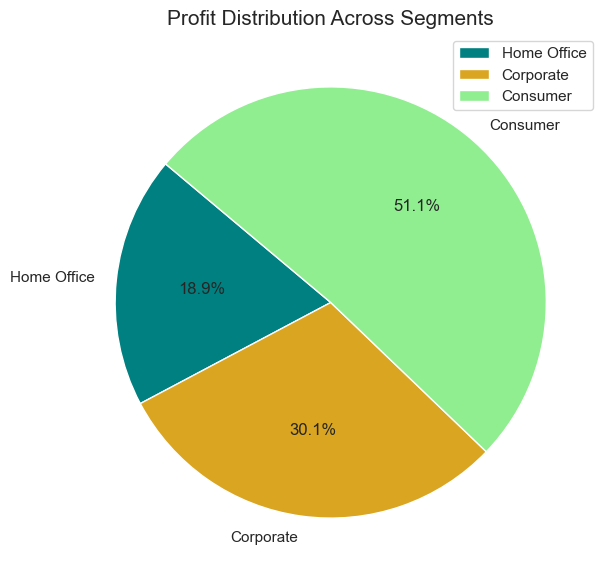

In [27]:
#Profit distribution across various segments
x = data.groupby(by='Segment')[['Profit']].sum()
y = x.sort_values(by=['Profit'],ascending=True)
y.plot(kind='pie', y='Profit', figsize=(9, 7), autopct='%1.1f%%', startangle=140, colors=['Teal', 'Goldenrod', 'LightGreen'])
plt.title("Profit Distribution Across Segments", fontsize=15)
plt.ylabel('')  
plt.show()

### Observation:
The Consumer segment is the most profitable, followed by the Corporate segment and Home Office. Prioritize retaining and attracting customers from the Consumer and Corporate segments.
Allocate resources and tailor marketing strategies to meet the needs and preferences of these segments.

## **City Profit and Sales Breakdown**

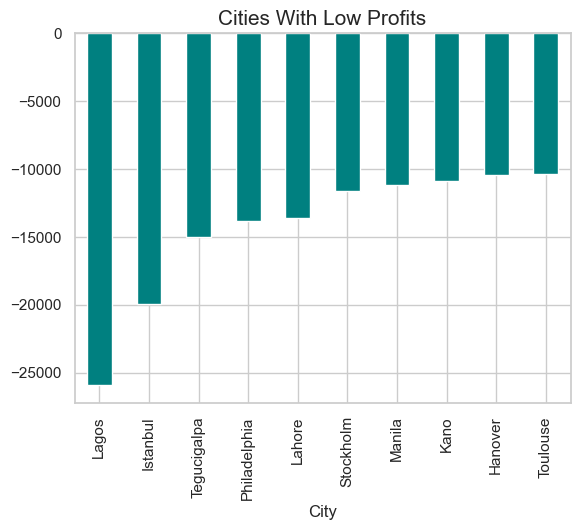

,Profit
City,
Lagos,-25922.51100
Istanbul,-19960.90800
Tegucigalpa,-15007.41608
Philadelphia,-13837.76740
Lahore,-13626.37200
Stockholm,-11632.89000
Manila,-11158.56150
Kano,-10916.21100
Hanover,-10440.16500


In [31]:
#Low Profit Cities
city_lowprofit = pd.DataFrame(data.groupby("City")["Profit"].sum().nsmallest(10))
city_lowprofit.groupby(by="City")["Profit"].sum().sort_values(ascending=True)[:11].plot(kind="bar",color = 'Teal')
plt.title("Cities With Low Profits",fontsize = 15)
plt.show()
city_lowprofit

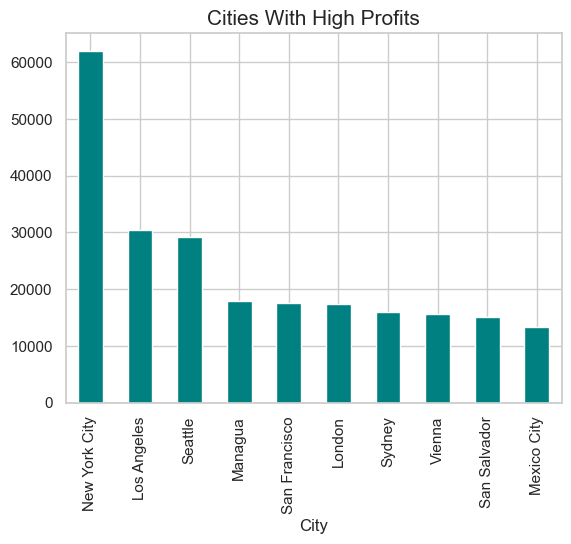

,Profit
City,
New York City,62036.98370
Los Angeles,30440.75790
Seattle,29156.09670
Managua,17853.71804
San Francisco,17507.38540
London,17378.71500
Sydney,16002.80700
Vienna,15660.84000
San Salvador,15036.51040


In [29]:
#High Profit Cities
city_highprofit = pd.DataFrame(data.groupby("City")["Profit"].sum().nlargest(10))
city_highprofit.groupby(by="City")["Profit"].sum().sort_values(ascending=False)[:11].plot(kind="bar",color = 'Teal')
plt.title("Cities With High Profits",fontsize = 15)
plt.show()
city_highprofit

In [ ]:
#Cities That Give Out Most Discount
data.groupby(by="City")["Discount"].sum().sort_values(ascending=False).plot(kind="bar",color = 'Teal')
plt.title("Cities With High Discounts", fontsize=15)
plt.show()

In [75]:
# Average Discount per city
avg_discount=data.groupby(by="City")['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

# Average Sales per city
avg_sales=data.groupby(by="City")['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

# Average Profit per city
avg_profit=data.groupby(by="City")['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities having High Average Discounts
high_discount = avg_discount[avg_discount['Discount'] >= 0.7]

# Cities having Low Average Discounts
low_discount = avg_discount[avg_discount['Discount'] == 0]

# Cities having High Average Sales
high_sales = avg_sales[avg_sales['Sales'] > 500]

# Cities having Low Average Sales
low_sales = avg_sales[avg_sales['Sales'] < 50]

# Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit'] > 100]

# Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit'] < 0]

In [76]:
# Cities with High-Average-Discounts but Low-Average-Sales
merged_cities= pd.merge(high_discount,low_sales, on=['City'],how='inner')
merged_cities.head()

,City,Discount,Sales
0,Deer Park,0.8,6.924000
1,Romeoville,0.8,8.952000
2,Missouri City,0.8,6.370000
3,Abilene,0.8,1.392000
4,Chitungwiza,0.7,38.234842


In [77]:
# Cities with high Average Sales as well as Average Profit
merged_cities2 = pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged_cities2

,City,Sales,Profit
0,Kamina,3817.260000,1068.660000
1,PaysandÃº,3473.140000,868.120000
2,Whakatane,3265.440000,1234.440000
3,Poitiers,2958.984000,953.274000
4,Plaisir,2848.286250,392.186250
...,...,...,...
245,Southport,505.029000,134.079000
246,Mentougou,504.360000,201.720000
247,Zhenjiang,502.845000,112.080000
248,Mianyang,500.617895,117.249474


In [78]:
#Cities with low Average discount but High Average Sales
merged_cities3 = pd.merge(low_discount,high_sales, on='City', how='inner')
merged_cities3

,City,Discount,Sales
0,Shouguang,0.0,897.915000
1,Shuangcheng,0.0,2819.520000
2,Zhongxiang,0.0,560.900000
3,Shumen,0.0,1272.600000
4,Shihezi,0.0,667.507500
...,...,...,...
197,Nizamabad,0.0,500.340000
198,George,0.0,556.185000
199,Ghent,0.0,690.342353
200,Fukuyama,0.0,685.395000


In [79]:
# Cities with low Average discount but High Average Profit
merged_cities4= pd.merge(low_discount, high_profit, on='City', how='inner')
merged_cities4

,City,Discount,Profit
0,Shouguang,0.0,111.690000
1,Sevastopol,0.0,155.640000
2,Bratsk,0.0,182.820000
3,Shuangcheng,0.0,338.220000
4,Seremban,0.0,110.562632
...,...,...,...
292,George,0.0,245.677500
293,Ghent,0.0,151.078235
294,Fukuyama,0.0,190.215000
295,Gaomi,0.0,467.280000


In [80]:
# Cities with high Average sales but low Average profit
merged_cities5 = pd.merge(high_sales,low_profit, on='City', how='inner')
merged_cities5.head()

,City,Sales,Profit
0,Houilles,987.95700,-54.963000
1,Taytay,939.71475,-103.805250
2,San Luis,932.48800,-352.018667
3,Abreu e Lima,928.25600,-81.224000
4,San Severo,925.02000,-447.180000


In [81]:
# Cities with high Average discount but low Average profit
merged_cities5 = pd.merge(high_discount,low_profit, on='City', how='inner')
merged_cities5

,City,Discount,Profit
0,Deer Park,0.8,-10.386000
1,Romeoville,0.8,-14.770800
2,Missouri City,0.8,-9.555000
3,Abilene,0.8,-3.758400
4,Chitungwiza,0.7,-70.821474
...,...,...,...
65,Victoria Falls,0.7,-5.325000
66,Jos,0.7,-67.501579
67,Kadoma,0.7,-173.976000
68,Sapele,0.7,-349.788000


In [82]:
# Cities with high Average discount but low Average Sales
merged_cities6 = pd.merge(high_discount,low_sales, on='City', how='inner')
merged_cities6.head()

,City,Discount,Sales
0,Deer Park,0.8,6.924000
1,Romeoville,0.8,8.952000
2,Missouri City,0.8,6.370000
3,Abilene,0.8,1.392000
4,Chitungwiza,0.7,38.234842


### Observations:
Cities such as Lagos, Istanbul, and Tegucigalpa are experiencing significant losses, indicating potential issues with market performance or operational efficiency.
New York City, Los Angeles, and Seattle are among the top cities generating the highest profits. These cities represent strong markets with favorable sales and profit margins.

Some cities exhibit high average discounts but low average sales or profits, suggesting the need for pricing strategy adjustments or cost optimization.
Conversely, cities with low average discounts but high average sales or profits may indicate successful pricing strategies or strong market demand.

There are cities with high average discounts but low average sales or profits, indicating potential inefficiencies in discounting strategies.
Cities with high average sales and profits may not necessarily offer high discounts, suggesting effective pricing and sales strategies.

Evaluate discounting strategies in cities with high discounts but low sales or profits to ensure optimal pricing and profitability.
Continuously monitor sales, profits, and discounting practices to make informed decisions and optimize performance across different cities.

## **Order Priority**

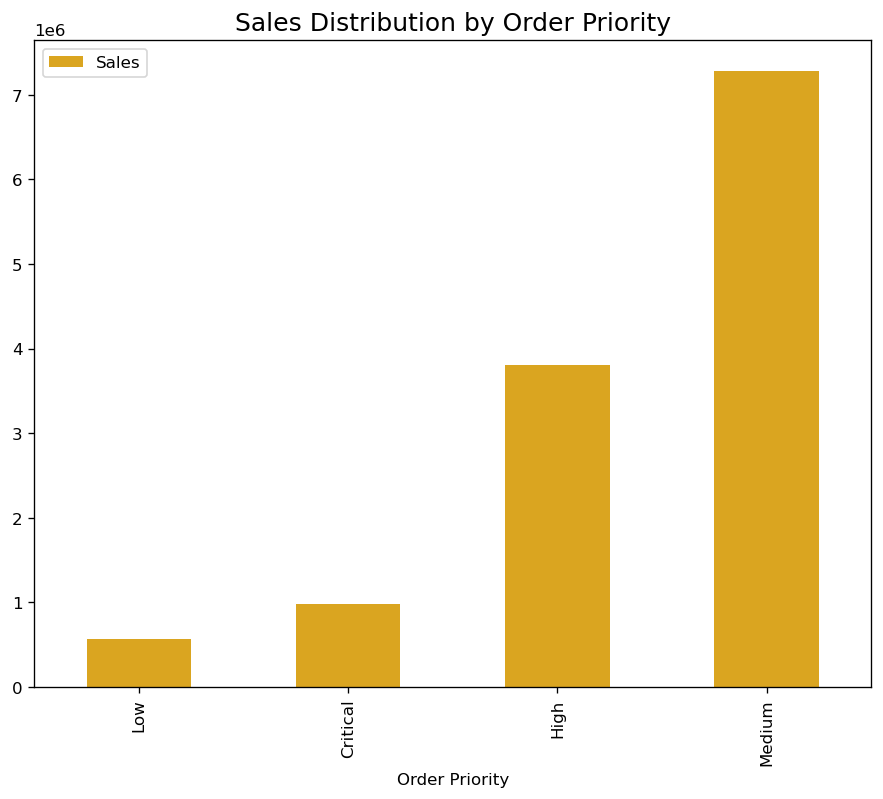

In [83]:
#Sales by Order Priority
x = data.groupby(by='Order Priority')[['Sales']].sum()
y = x.sort_values(by=['Sales'],ascending=True)
y.plot(kind='bar', figsize=(9,7), color = 'Goldenrod')
plt.title("Sales Distribution by Order Priority", fontsize=15)
plt.show()

## **Regions**

In [33]:
# Regions with highest Average shipping cost
avg_ship= pd.DataFrame(data.groupby(by="Region")['Shipping Cost'].agg(np.mean).sort_values(ascending=False))
avg_ship

,Shipping Cost
Region,
North Asia,40.646112
Central Asia,38.003003
Oceania,34.593780
Southeast Asia,29.937948
North,27.476299
Central,26.710494
East,25.542001
South,25.353509
West,23.887687


In [43]:
# Regions with highest Profits
avg_reg_profit= pd.DataFrame(data.groupby("Region")["Profit"].sum().nlargest(10))
avg_reg_profit
                              

,Profit
Region,
Central,311403.98164
North,194597.95252
North Asia,165578.42100
South,140355.76618
Central Asia,132480.18700
Oceania,120089.11200
West,108418.44890
East,91522.78000
Africa,88871.63100


### Observation:
Central region has the highest profits followed by North and North Asia regions.

## Ship Mode

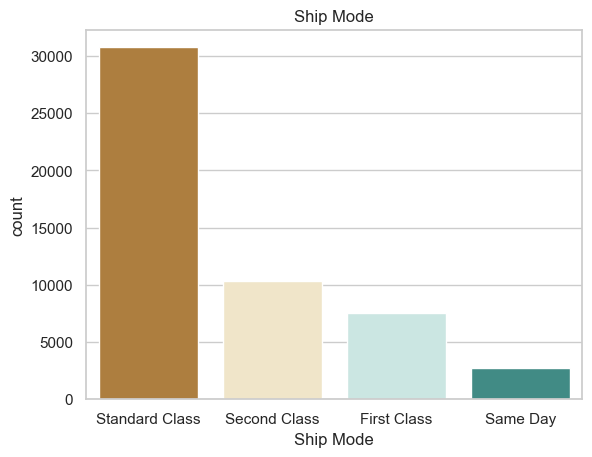

In [37]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(data['Ship Mode'], palette="BrBG")
plt.title("Ship Mode")
plt.show()

### Observation:
Standard Class is the most preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

# **Future Sales Forecasting**

In [85]:
monthly_revenue = data.groupby(['Month', 'Year'])['Sales'].sum().reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=months, ordered=True)
monthly_revenue.sort_values(by=['Year', 'Month'], inplace=True)
monthly_revenue.reset_index(drop=True, inplace=True)
monthly_revenue['month-year'] = monthly_revenue['Month'].astype(str) + ' ' + monthly_revenue['Year'].astype(str)

In [86]:
adf_test = adfuller(monthly_revenue['Sales'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.046292
p-value: 0.962197


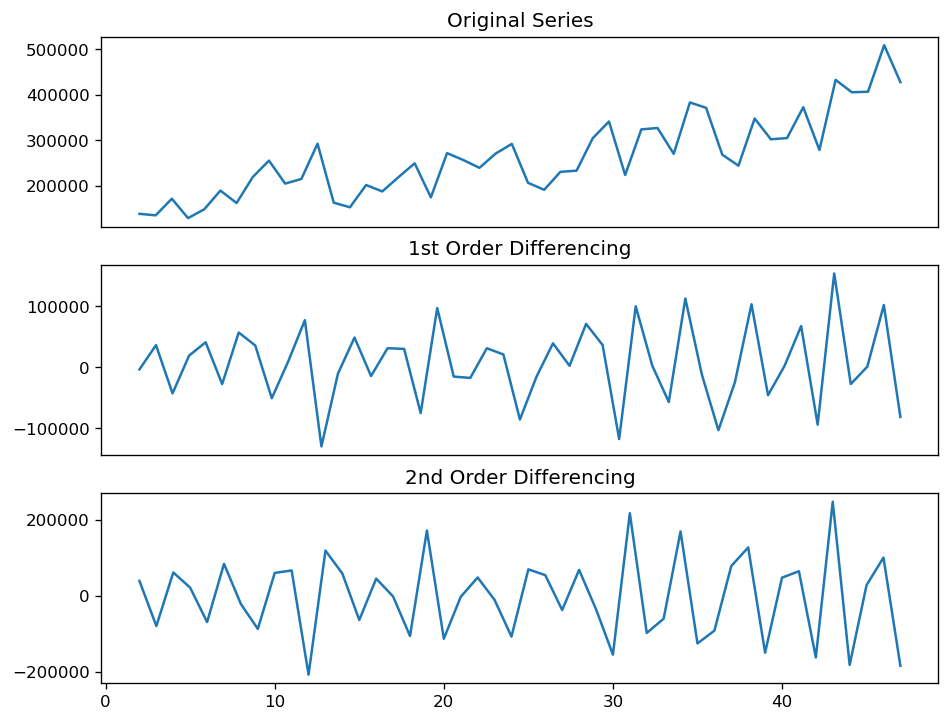

In [87]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(monthly_revenue.Sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(monthly_revenue.Sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(monthly_revenue.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()
ax3.plot(monthly_revenue.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

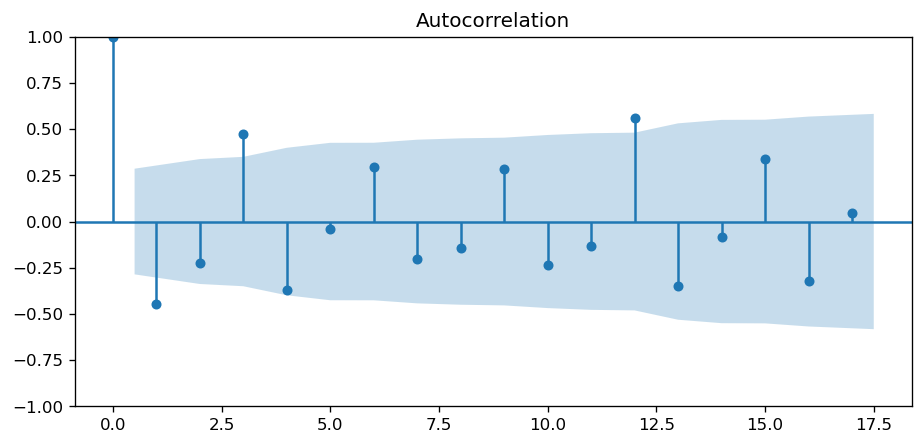

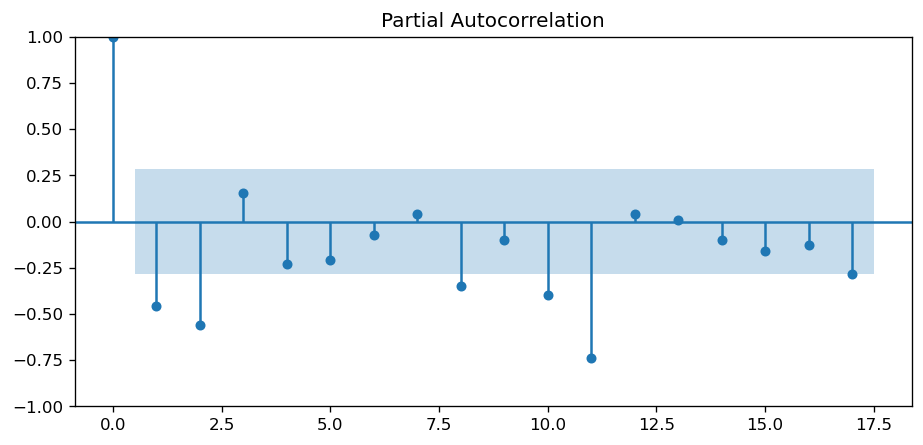

In [88]:
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':120})
plot_acf(monthly_revenue['Sales'].diff().dropna())
plot_pacf(monthly_revenue['Sales'].diff().dropna())
plt.show()

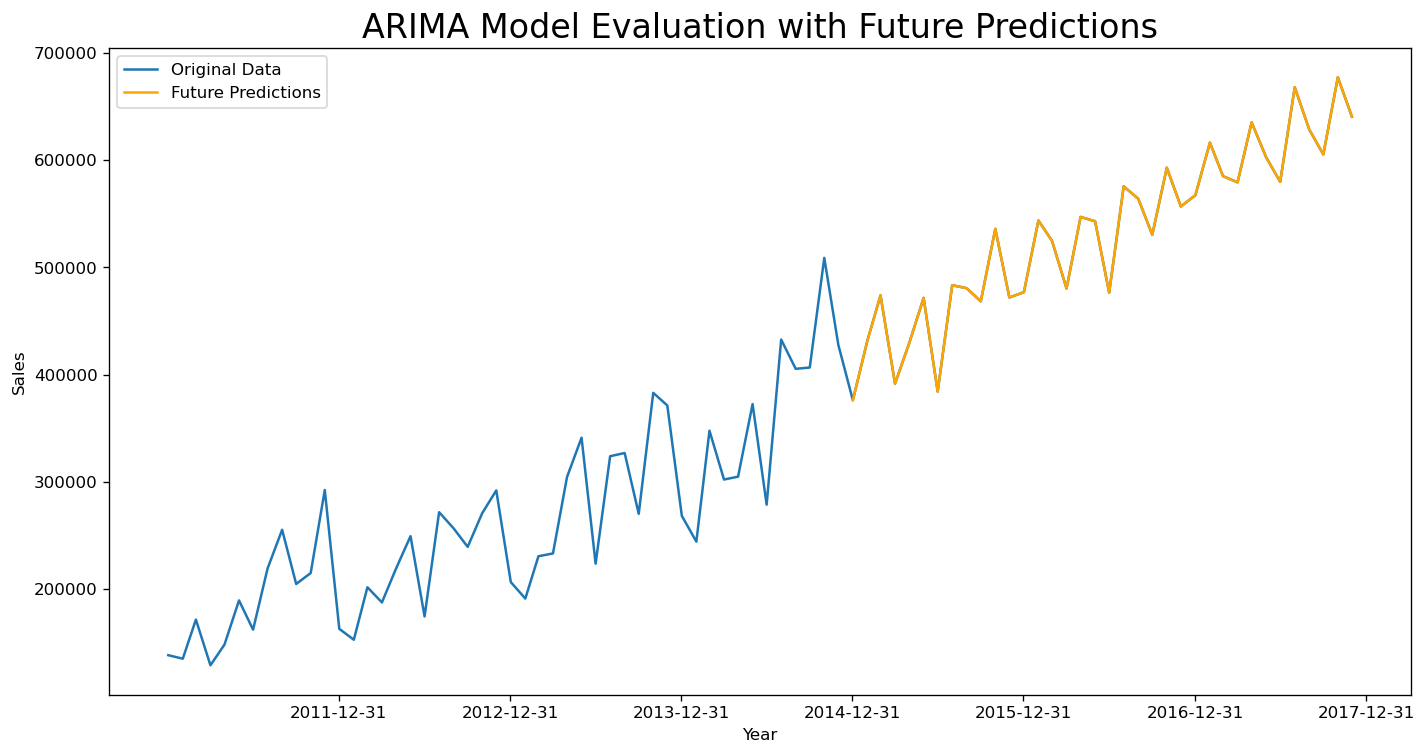

In [89]:
monthly_revenue['month-year'] = pd.to_datetime(monthly_revenue['month-year'])

# Split the data into train and test
train_size = int(len(monthly_revenue) * 0.8)
train, test = monthly_revenue[0:train_size], monthly_revenue[train_size:len(monthly_revenue)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(monthly_revenue['Sales'], order=(12, 2, 4))
model_train_fit = model_train.fit()

# Generating future dates 
future_dates = [monthly_revenue['month-year'].max() + pd.DateOffset(months=x) for x in range(1, 37)]

# Predicting future values
future_predictions = model_train_fit.predict(start=len(monthly_revenue), end=len(monthly_revenue) + 35, dynamic=True)
future_df = pd.DataFrame({'month-year': future_dates, 'Sales': future_predictions.values})
future_df.set_index('month-year', inplace=True)
combined_data = pd.concat([monthly_revenue.set_index('month-year'), future_df])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Sales'], label='Original Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')
plt.xticks(combined_data.index.to_period('Y').unique())
plt.title('ARIMA Model Evaluation with Future Predictions',  fontsize=20)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()



### Observations:
Performed time series analysis to reveal underlying patterns and seasonality.

The Augmented Dickey-Fuller (ADF) test indicated a high p-value (0.962197), suggesting the sales data is likely non-stationary. This implies the presence of trends or seasonality within the data.

An ARIMA (AutoRegressive Integrated Moving Average) model was applied to the sales data to capture its temporal structure.
Future sales values were forecasted using the fitted ARIMA model for the next 36 months.

The forecasted sales data exhibited an upward trend for the forecasted months, indicating potential sales growth.
The forecasted sales data was plotted alongside the original sales data to visualize the predicted trends.

The forecasted sales data holds valuable insights for business decision-making, such as inventory management, resource allocation, and financial planning.
Understanding future sales trends can help businesses prepare for fluctuations in demand and optimize their operations accordingly.

This comprehensive analysis enables businesses to make informed decisions based on predicted sales trends, thereby enhancing their strategic planning and performance.


## Overall Recommendations:
Focus on Technology sub-category and Copiers and Phones as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
Selling Tables, fasteners, labels, and supplies result in huge losses, so the business has to consider to bundle them together with High Selling or Profitable sub-category such as Copiers or Office Supplies products.

Create a Home Office package containing essential products such as tables, chairs, phones, copiers, storage solutions, labels, and fasteners to cater to the needs of busy Home Office customers.
Target the Consumer and Corporate segments, which comprise over 70% of the customer base, with tailored marketing campaigns.
Focus marketing efforts particularly on customers from the Central and North regions, optimizing resources for maximum impact and engagement.

Implement loyalty programs to incentivize repeat purchases and retention, offering exclusive rewards or discounts.
Target customers based on cities with higest sales and profits, driving foot traffic with local events or promotions.
Suggest relevant products to customers based on past purchase history or preferences, incorporating recommendations into marketing.Create a Home Office package containing essential products such as tables, chairs, phones, copiers, storage solutions, labels, and fasteners to cater to the needs of busy Home Office customers.
Target the Consumer and Corporate segments, which comprise over 70% of the customer base, with tailored marketing campaigns.
Focus marketing efforts particularly on customers from the Central and North regions, optimizing resources for maximum impact and engagement.
